<h1>Do drivers that qualify higher on the starting grid in Formula One races end up finishing higher in the race?</h1>
<h3>Null Hypothesis</h3>

- A driver's qualifying position has no impact on their race result.
<h3>Alternative Hypothesis</h3>

- A driver's qualifying postion has an impact on their race result.

I got the qualifying and race results from this [Github repo](https://github.com/toUpperCase78/formula1-datasets) by [toUpperCase78](https://github.com/toUpperCase78), who sourced the data from the [Formula One website](https://www.formula1.com/).  This data covers the 2022 Formula One season, which had 22 races. 

<h3>Some Context</h3>

In Formula One, drivers participate in qualifying sessions and set lap times. The driver with the fastest lap time starts at the front of the grid in the race, the second fastest starts in the second grid slot and so on. 

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)



In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [20]:
%%R

# My commonly used R imports

require('tidyverse')
require('ggrepel')


R[write to console]: Loading required package: ggrepel



In [4]:
#Read in the CSV that contains race results using pandas

df_race = pd.read_csv('group_race.csv')
#Create a unique identifier upon which you can join the race results data to the qualifying results data
df_race['identifier'] = df_race['Track'] + df_race['Driver']
df_race

,Unnamed: 0,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap,identifier
0,1,Bahrain,1,16,Charles Leclerc,Ferrari,1,57,1:37:33.584,26,Yes,01:34:00,BahrainCharles Leclerc
1,2,Bahrain,2,55,Carlos Sainz,Ferrari,3,57,+5.598,18,No,01:35:00,BahrainCarlos Sainz
2,3,Bahrain,3,44,Lewis Hamilton,Mercedes,5,57,+9.675,15,No,01:36:00,BahrainLewis Hamilton
3,4,Bahrain,4,63,George Russell,Mercedes,9,57,+11.211,12,No,01:36:00,BahrainGeorge Russell
4,5,Bahrain,5,20,Kevin Magnussen,Haas Ferrari,7,57,+14.754,10,No,01:36:00,BahrainKevin Magnussen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,436,Abu Dhabi,16,47,Mick Schumacher,Haas Ferrari,12,57,+1 lap,0,No,01:29:00,Abu DhabiMick Schumacher
436,437,Abu Dhabi,17,20,Kevin Magnussen,Haas Ferrari,16,57,+1 lap,0,No,01:31:00,Abu DhabiKevin Magnussen
437,438,Abu Dhabi,18,44,Lewis Hamilton,Mercedes,5,55,DNF,0,No,01:29:00,Abu DhabiLewis Hamilton
438,439,Abu Dhabi,19,6,Nicholas Latifi,Williams Mercedes,20,55,DNF,0,No,01:30:00,Abu DhabiNicholas Latifi


In [5]:
#same for the quali data
df_qual = pd.read_csv('group_quali.csv')
df_qual['identifier'] = df_qual['Track'] + df_qual['Driver']
df_qual

,Unnamed: 0,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps,identifier
0,1,Bahrain,1,16,Charles Leclerc,Ferrari,1:31.471,1:30.932,1:30.558,15,BahrainCharles Leclerc
1,2,Bahrain,2,1,Max Verstappen,Red Bull Racing RBPT,1:31.785,1:30.757,1:30.681,14,BahrainMax Verstappen
2,3,Bahrain,3,55,Carlos Sainz,Ferrari,1:31.567,1:30.787,1:30.687,15,BahrainCarlos Sainz
3,4,Bahrain,4,11,Sergio Perez,Red Bull Racing RBPT,1:32.311,1:31.008,1:30.921,18,BahrainSergio Perez
4,5,Bahrain,5,44,Lewis Hamilton,Mercedes,1:32.285,1:31.048,1:31.238,17,BahrainLewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...
435,436,Abu Dhabi,16,20,Kevin Magnussen,Haas Ferrari,1:25.834,NaN,NaN,9,Abu DhabiKevin Magnussen
436,437,Abu Dhabi,17,10,Pierre Gasly,AlphaTauri RBPT,1:25.859,NaN,NaN,9,Abu DhabiPierre Gasly
437,438,Abu Dhabi,18,77,Valtteri Bottas,Alfa Romeo Ferrari,1:25.892,NaN,NaN,6,Abu DhabiValtteri Bottas
438,439,Abu Dhabi,19,23,Alexander Albon,Williams Mercedes,1:26.028,NaN,NaN,9,Abu DhabiAlexander Albon


In [6]:
#join the two dfs 
mergedDf = df_qual.merge(df_race, left_on='identifier', right_on='identifier')
df = mergedDf[['Track_x', 'Position_x', 'Position_y', 'Driver_x']].rename(columns={"Position_x": "Qual", "Position_y": "Race", "Track_x": "Track", "Driver_x": "Driver"}, errors="raise")

In [7]:
%%R -i df

df

             Track Qual Race           Driver
0          Bahrain    1    1  Charles Leclerc
1          Bahrain    2   19   Max Verstappen
2          Bahrain    3    2     Carlos Sainz
3          Bahrain    4   18     Sergio Perez
4          Bahrain    5    3   Lewis Hamilton
5          Bahrain    6    6  Valtteri Bottas
6          Bahrain    7    5  Kevin Magnussen
7          Bahrain    8    9  Fernando Alonso
8          Bahrain    9    4   George Russell
9          Bahrain   10   NC     Pierre Gasly
10         Bahrain   11    7     Esteban Ocon
11         Bahrain   12   11  Mick Schumacher
12         Bahrain   13   15     Lando Norris
13         Bahrain   14   13  Alexander Albon
14         Bahrain   15   10      Guanyu Zhou
15         Bahrain   16    8     Yuki Tsunoda
16         Bahrain   17   17  Nico Hulkenberg
17         Bahrain   18   14 Daniel Ricciardo
18         Bahrain   19   12     Lance Stroll
19         Bahrain   20   16  Nicholas Latifi
20    Saudi Arabia    1    4     S

In [13]:
# convert characters to numeric and removing NCs 
# NC means Not classified, which basically means someone did not set a time in qualifying or did not finish the race. By changing the data to numeric, we're removing NCs.
df.Qual = pd.to_numeric(df.Qual, errors='coerce')
df.Race = pd.to_numeric(df.Race, errors='coerce')

df

,Track,Qual,Race,Driver
0,Bahrain,1.0,1.0,Charles Leclerc
1,Bahrain,2.0,19.0,Max Verstappen
2,Bahrain,3.0,2.0,Carlos Sainz
3,Bahrain,4.0,18.0,Sergio Perez
4,Bahrain,5.0,3.0,Lewis Hamilton
...,...,...,...,...
435,Abu Dhabi,16.0,17.0,Kevin Magnussen
436,Abu Dhabi,17.0,14.0,Pierre Gasly
437,Abu Dhabi,18.0,15.0,Valtteri Bottas
438,Abu Dhabi,19.0,13.0,Alexander Albon


`geom_smooth()` using formula = 'y ~ x'


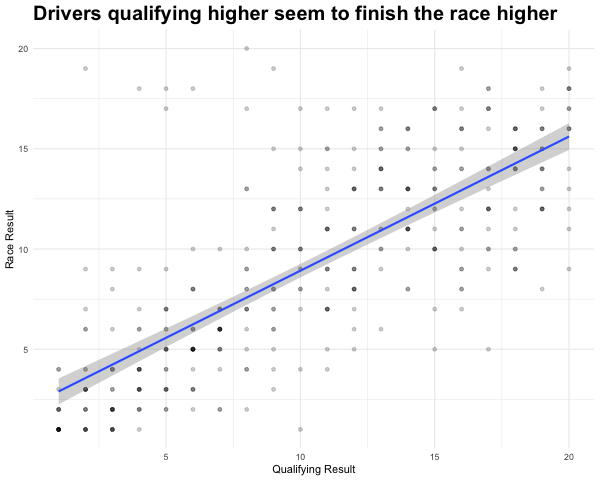

In [29]:
%%R -i df -w 600

#plot the distribution and the line of least squares
ggplot(df) + 
    aes(x=Qual, y=Race) +
    geom_point(alpha = 0.2) +
    geom_smooth(method='lm') +
    labs(
        x='Qualifying Result', 
        y='Race Result',
        title='Drivers qualifying higher seem to finish the race higher'
    ) +
    theme_minimal() +
    theme(
        plot.title = element_text(size=20, face='bold'),
    )


`geom_smooth()` using formula = 'y ~ x'


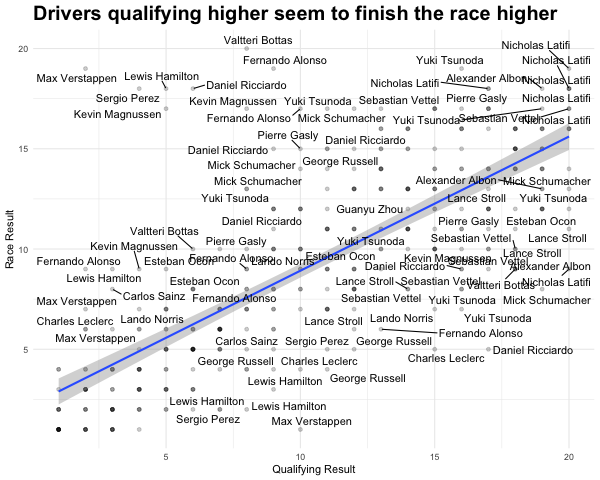

In [33]:
%%R -i df -w 600

#the same distribution with the names of the drivers

ggplot(df) + 
    aes(x=Qual, y=Race) +
    geom_point(alpha = 0.2) +
    geom_smooth(method='lm') +
    geom_text_repel(aes(label=Driver)) +
    labs(
        x='Qualifying Result', 
        y='Race Result',
        title='Drivers qualifying higher seem to finish the race higher'
    ) +
    theme_minimal() +
    theme(
        plot.title = element_text(size=20, face='bold')
    )

In [16]:
%%R -i df

#run a linear regression on our data
model <- lm(Race ~ Qual, data = df)
summary(model)



Call:
lm(formula = Race ~ Qual, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6027 -2.2347 -0.5729  1.7356 15.4345 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.22724    0.35574   6.261 1.06e-09 ***
Qual         0.66914    0.03023  22.133  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.336 on 370 degrees of freedom
  (68 observations deleted due to missingness)
Multiple R-squared:  0.5697,	Adjusted R-squared:  0.5685 
F-statistic: 489.8 on 1 and 370 DF,  p-value: < 2.2e-16



<h3>What can I learn from this statistical test?</h3>

A particular driver's qualifying result has some effect on their race result. This particular dataset, which is all Formula One qualifying sessions and race sessions in the 2022 season shows that 56% of race results can be explained by a driver's qualifying position. The correlation is positive, which means that in this dataset, we can assume that if the driver's qualifying position is lower (which is desirable), around 56% of the time, their race result will be a lower position as well. 

The p-value is also very small, which indicates that these results are statistically significant, or the fact that many drivers who qualify well end up in top positions is not up to chance. Logically, this makes sense. Qualifying gives drivers an advantage; they are covering lesser distance in the first lap than the drivers behind them.


<h3>What can I not learn from this statistical test?</h3>

Without further analysis, we cannot take conclusions about the 2022 season and apply them to other years. There may be different regulations about car make-up in 2022 or in other years that can affect driver speed or overtaking ability. Races in general are unpredictable because crashes or poor weather can cause drastic changes in the lineup. Rain, for example, is known as the great equalizer. A driver's car may be faster in dry weather but more slippery and unwielding in wet weather, allowing a slower but more stable car to go faster. Even the tyres a driver chooses to use can affect driver speed, in turn affecting their position. 

<h3>More reporting questions</h3>

What are the most important variables that I should control for to make the R-squared value more accurate? In other words, what else contributes to a high race result? How do you account for pure luck (e.g. shock crashes, bad pit stops, hostile weather), or quantify a driver's skill, or a team's ability to build a superior car? 